In [3]:
from random import random, seed, randrange
from math import floor, pi
import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
import pandas as pd
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]

In [4]:
%run -i gcmc.py

In [5]:
e_co = 242.0 # eps over kb[K]
s_co = 3.615 # sigma [A]

# Run the Experiment
### Use only CO2 at different LJ Parameters

In [6]:
yco = 1.0   #[]
P = 100 #[bar]

for i in range(1):
    yco = data_dump.yc0[i]
    P_res = data_dump.P0[i]*10**5 #[Pa]
    T = 45 + 273.15 #K
    fco, fme = PR_Fugacity( P_res/10**5, T, yco )
    fco = fco*10**5
    fme = fme*10**5
    
    print( "Co:\t", round( fme/10**5, 1 ), "bar\tMe:\t", round( fme/10**5, 1 ), "bar")

    s_box = 50
    N_max = 50000
    Vol = s_box**3
    kb = 1.3806*10**(7) #[Pa*A^3/K]
    Nco = floor(fco*Vol/kb/T)
    Nme = floor(fme*Vol/kb/T)
    Nc = 0
    rc = s_box
    beta = 1/T
    zz_co = beta*fco
    zz_me = beta*fme
    delta = 1
    pi_move = 0.5

    N_moves = 1000
    N_equil = 10
    N_prod = 10000

    rhocov,rhomev,Env,Pv,Ncov, Nmev = mc_run()
    data_dump = pd.DataFrame()
    data_dump['ycf'] = Ncov/(Ncov + Nmev)
    data_dump['Pf'] = Pv*10 #[bar]
    data_dump['rhoco'] = rhocov
    data_dump['rhome'] = rhomev
    #filename = "../data_output/yco" + str(yco) + "P" + str(P) + "/run" + str(i) + ".csv"
    #data_dump.to_csv( filename, index = False)

Co:	 0.0 bar	Me:	 0.0 bar
0 yco:  1.0 N:  333 P:  70.61 En:  -244.03
1000 yco:  1.0 N:  453 P:  67.11 En:  -335.9
2000 yco:  1.0 N:  506 P:  91.71 En:  -363.23
3000 yco:  1.0 N:  457 P:  80.02 En:  -326.27
4000 yco:  1.0 N:  400 P:  93.38 En:  -292.52
5000 yco:  1.0 N:  472 P:  80.97 En:  -343.5
6000 yco:  1.0 N:  475 P:  79.8 En:  -347.04
7000 yco:  1.0 N:  428 P:  94.73 En:  -289.78
8000 yco:  1.0 N:  480 P:  92.85 En:  -337.29
9000 yco:  1.0 N:  543 P:  88.91 En:  -379.07


In [7]:
data_dump.to_csv( "pure_co2_p100_s40", index = False)

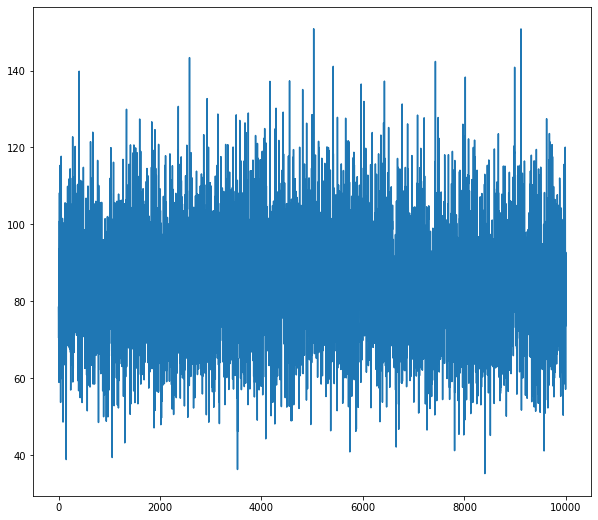

In [8]:
plt.plot( data_dump.Pf )

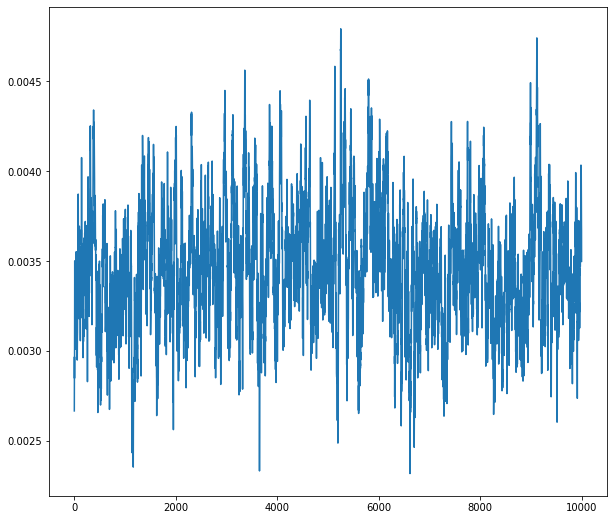

In [9]:
plt.plot( data_dump.rhoco)

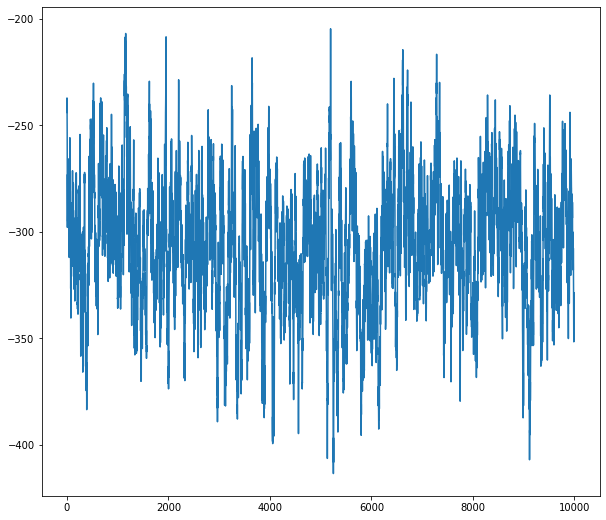

In [10]:
plt.plot( Env )

In [7]:
exp_data = pd.read_csv("../c02.txt", sep='\t')
V = Vol*10**(-27)
exp_data['particles'] = exp_data['Density (mol/l)']*( 6.02*10**(23) )*V
exp_data['Density (part/A3)'] = exp_data['Density (mol/l)']*( 6.02*10**(23) )*10**(-27)
exp_data[ exp_data['Pressure (bar)'] == 100]

NameError: name 'Vol' is not defined

In [ ]:
e_co = 257.8
s_co = 3.71

In [ ]:
yco = 1.0   #[]
P = 100 #[bar]

for i in range(1):
    
    P_res = P*10**5 #[Pa]
    T = 45 + 273.15 #K
    fco, fme = PR_Fugacity( P_res/10**5, T, yco )
    fco = fco*10**5
    fme = fme*10**5
    
    print( "Co:\t", round( fco/10**5, 1 ), "bar\tMe:\t", round( fme/10**5, 1 ), "bar")

    s_box = 50
    N_max = 50000
    Vol = s_box**3
    kb = 1.3806*10**(7) #[Pa*A^3/K]
    Nco = floor(fco*Vol/kb/T)
    Nme = floor(fme*Vol/kb/T)
    Nc = 0
    rc = s_box
    beta = 1/T
    zz_co = beta*fco
    zz_me = beta*fme
    delta = 1
    pi_move = 0.5

    N_moves = 1000
    N_equil = 10
    N_prod = 10000

    rhocov,rhomev,Env,Pv,Ncov, Nmev = mc_run()
    data_dump = pd.DataFrame()
    data_dump['ycf'] = Ncov/(Ncov + Nmev)
    data_dump['Pf'] = Pv*10 #[bar]
    data_dump['rhoco'] = rhocov
    data_dump['rhome'] = rhomev
    #filename = "../data_output/yco" + str(yco) + "P" + str(P) + "/run" + str(i) + ".csv"
    #data_dump.to_csv( filename, index = False)

In [ ]:
plt.plot( data_dump.Pf )

In [ ]:
plt.plot( data_dump.rhoco)

In [ ]:
plt.plot( Env )

In [ ]:
i = i+1
print(i)